## Inferential Statistics
Inferential statistics is the branch of statistics that allows us to make predictions, decisions, or generalizations about a population based on information obtained from a sample. Unlike descriptive statistics, which only summarizes the data you have, inferential statistics enables you to draw conclusions about a larger group than the one you actually measured.
Example:

Imagine a company wants to know the average salary of software engineers in a country with 1 million engineers. Surveying all 1 million is impractical. Instead, they randomly survey 1,000 engineers.
- Step 1: Collect Sample Data – Gather salaries of 1,000 engineers.
- Step 2: Calculate Sample Statistics – Compute the sample mean (e.g., ₹12 lakh/year) and sample standard deviation.
- Step 3: Make Inferences – Use inferential methods (like confidence intervals) to estimate the population mean salary and quantify uncertainty.
In this way, from just a small portion of data, we can make educated guesses about the entire population.

## Sampling Methods
Sampling is the process of selecting a subset (sample) from a population to make inferences about the population. Choosing the right sampling method is crucial for accuracy and minimizing bias.
1. Simple Random Sampling (SRS)
Definition:
Every member of the population has an equal chance of being selected.
**Example:**
You have a dataset of 1000 students’ exam scores. You randomly select 50 students to estimate the average score of the entire class.



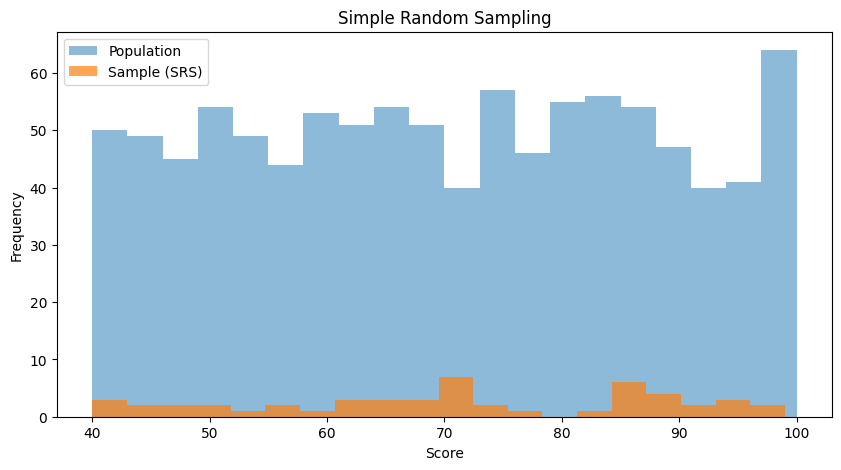

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Population: 1000 students with scores between 40-100
population = np.random.randint(40, 101, size=1000)

# Simple Random Sampling: choose 50 students
sample_srs = np.random.choice(population, size=50, replace=False)

# Plot
plt.figure(figsize=(10,5))
plt.hist(population, bins=20, alpha=0.5, label='Population')
plt.hist(sample_srs, bins=20, alpha=0.7, label='Sample (SRS)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Simple Random Sampling')
plt.legend()
plt.show()


Explanation:
The histogram shows how a small random sample reflects the overall population distribution.

2. Stratified Sampling

Definition:
Population is divided into strata (groups) based on some characteristic, then samples are drawn from each stratum proportionally.

Example:
You have students from 3 different classes (A, B, C). You want a sample representing all classes proportionally.

C:\Users\Welcome\AppData\Local\Temp\ipykernel_21792\4003165577.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_stratified = data.groupby('Class', group_keys=False).apply(lambda x: x.sample(frac=0.1))


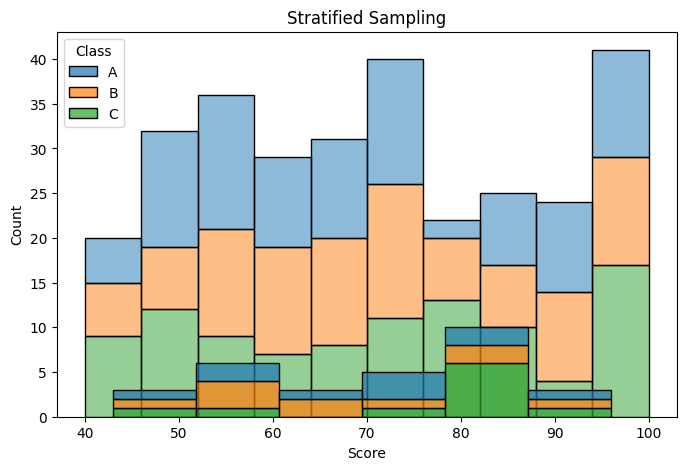

In [4]:
import pandas as pd

# Create population with class labels
data = pd.DataFrame({
    'Score': np.random.randint(40, 101, size=300),
    'Class': ['A']*100 + ['B']*100 + ['C']*100
})

# Stratified Sampling: 10% from each class
sample_stratified = data.groupby('Class', group_keys=False).apply(lambda x: x.sample(frac=0.1))

# Plot
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(data=data, x='Score', hue='Class', multiple='stack', alpha=0.5)
sns.histplot(data=sample_stratified, x='Score', hue='Class', multiple='stack', alpha=0.7, edgecolor='k')
plt.title('Stratified Sampling')
plt.show()


Explanation:
Each class contributes proportionally, ensuring the sample represents the population structure.

3. Cluster Sampling

Definition:
Population is divided into clusters (often geographically or naturally), then some clusters are selected entirely.

Example:
Surveying households in 5 cities but only randomly selecting 2 cities and surveying all households within them.

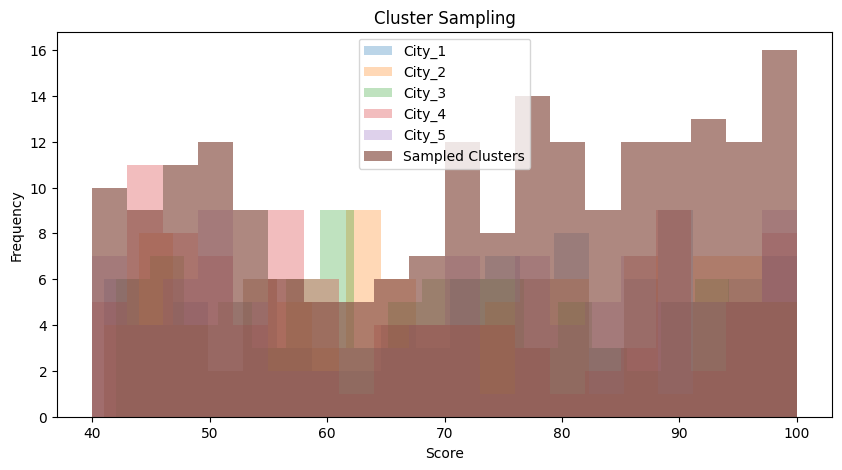

In [5]:
# Population: 5 clusters (cities) with 100 data points each
clusters = {f'City_{i}': np.random.randint(40,101,100) for i in range(1,6)}

# Cluster Sampling: select 2 clusters randomly
selected_clusters = np.random.choice(list(clusters.keys()), size=2, replace=False)
sample_cluster = np.concatenate([clusters[c] for c in selected_clusters])

# Plot
plt.figure(figsize=(10,5))
for city, scores in clusters.items():
    plt.hist(scores, bins=20, alpha=0.3, label=city)
plt.hist(sample_cluster, bins=20, alpha=0.7, label='Sampled Clusters')
plt.title('Cluster Sampling')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


4. Systematic Sampling

Definition:
Select every k-th element from the population.

Example:
You want to survey every 10th student in a line of 1000 students.

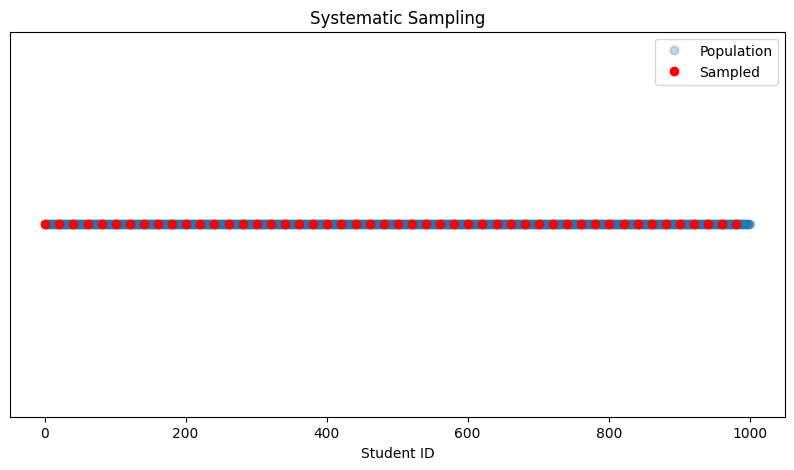

In [7]:
# Population
population = np.arange(1, 1001)

# Systematic Sampling: every 20th student
k = 20
sample_systematic = population[::k]

# Plot
plt.figure(figsize=(10,5))
plt.plot(population, np.zeros_like(population), 'o', alpha=0.3, label='Population')
plt.plot(sample_systematic, np.zeros_like(sample_systematic), 'ro', label='Sampled')
plt.title('Systematic Sampling')
plt.xlabel('Student ID')
plt.yticks([])
plt.legend()
plt.show()


## Sampling Distribution

Definition:
A sampling distribution is the probability distribution of a statistic (like the sample mean, proportion, or variance) obtained from repeated samples of the same size drawn from a population.

It shows how the statistic varies from sample to sample, helping us understand the variability and reliability of estimates.

Example: Sampling Distribution of the Mean

Scenario:
You have a population of 10,000 students’ exam scores (40–100). You take repeated samples of size 50 and calculate the mean score for each sample. Plotting these means gives the sampling distribution of the sample mean.

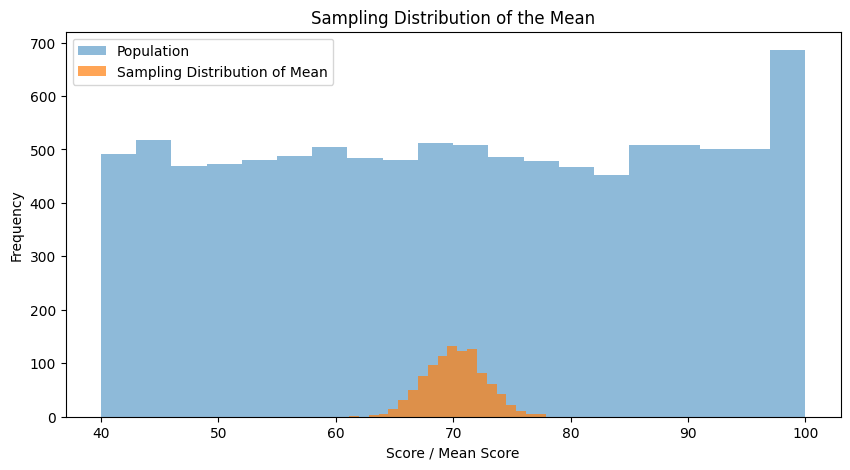

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Population
population = np.random.randint(40, 101, size=10000)

# Number of samples
num_samples = 1000
sample_size = 50
sample_means = []

# Generate sample means
for _ in range(num_samples):
    sample = np.random.choice(population, size=sample_size, replace=False)
    sample_means.append(np.mean(sample))

# Plot population vs sampling distribution
plt.figure(figsize=(10,5))
plt.hist(population, bins=20, alpha=0.5, label='Population')
plt.hist(sample_means, bins=20, alpha=0.7, label='Sampling Distribution of Mean')
plt.xlabel('Score / Mean Score')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of the Mean')
plt.legend()
plt.show()


Explanation:

- The population histogram shows all student scores.

- The sampling distribution histogram (of sample means) is more concentrated around the population mean, showing less variability.

- This illustrates that larger samples give more reliable estimates.



## **Confidence Intervals (CI)**

**Definition:**
A confidence interval is a **range of values** around a sample statistic that is likely to contain the **true population parameter** with a certain level of confidence (commonly 95% or 99%).

It quantifies **uncertainty** in estimating population parameters.

---

### **1. CI for Mean (Known Variance)**

**Formula:**

$
CI = \bar{x} \pm Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
$

Where:

* ($\bar{x}$) = sample mean
* ($\sigma$) = population standard deviation (known)
* (n) = sample size
* ($Z_{\alpha/2}$) = Z-score for confidence level (e.g., 1.96 for 95%)

**Example:**
Population standard deviation is known (($\sigma=15$)), sample of 50 students has mean 70. Calculate 95% CI for population mean.




95% CI: 65.84228852695097 - 74.15771147304903


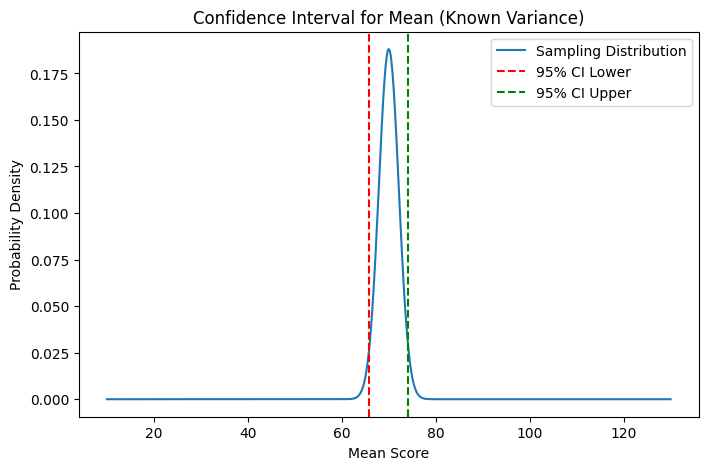

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Sample data
sample_mean = 70
sigma = 15  # known
n = 50
confidence = 0.95

# Z-score
z = norm.ppf(0.975)  # 95% CI, two-tailed

# Confidence Interval
margin_error = z * (sigma/np.sqrt(n))
ci_lower = sample_mean - margin_error
ci_upper = sample_mean + margin_error
print("95% CI:", ci_lower, "-", ci_upper)

# Visualization
x = np.linspace(sample_mean - 4*sigma, sample_mean + 4*sigma, 1000)
plt.figure(figsize=(8,5))
plt.plot(x, norm.pdf(x, sample_mean, sigma/np.sqrt(n)), label='Sampling Distribution')
plt.axvline(ci_lower, color='red', linestyle='--', label='95% CI Lower')
plt.axvline(ci_upper, color='green', linestyle='--', label='95% CI Upper')
plt.title('Confidence Interval for Mean (Known Variance)')
plt.xlabel('Mean Score')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


### **2. CI for Mean (Unknown Variance)**

**Formula:**

$$
CI = \bar{x} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}}
$$

Where:

* (s) = sample standard deviation
* ($t_{\alpha/2, n-1}$) = t-score with (n-1) degrees of freedom

In [10]:
from scipy.stats import t

# Sample data
sample = np.random.randint(50, 100, 30)
sample_mean = np.mean(sample)
s = np.std(sample, ddof=1)
n = len(sample)

# t-score for 95% CI
t_score = t.ppf(0.975, df=n-1)
margin_error = t_score * (s/np.sqrt(n))
ci_lower = sample_mean - margin_error
ci_upper = sample_mean + margin_error
print("95% CI (unknown variance):", ci_lower, "-", ci_upper)


95% CI (unknown variance): 62.91088464146559 - 72.4891153585344


### **3. CI for Proportion**

**Formula:**

$$
CI = \hat{p} \pm Z_{\alpha/2} \cdot \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$

Where:

* ($\hat{p}$) = sample proportion
* (n) = sample size

**Example:**
Out of 200 survey respondents, 120 like a product ((\hat{p} = 120/200 = 0.6)). Compute 95% CI for population proportion.

In [12]:
# Sample data
p_hat = 120/200
n = 200
z = norm.ppf(0.975)  # 95% CI

# Margin of error
margin_error = z * np.sqrt(p_hat*(1-p_hat)/n)
ci_lower = p_hat - margin_error
ci_upper = p_hat + margin_error
print("95% CI for proportion:", ci_lower, "-", ci_upper)


95% CI for proportion: 0.5321048559554297 - 0.6678951440445703


Hypothesis Testing
Definition

Hypothesis testing is a statistical method used to make decisions about a population based on sample data.
We test an assumption (null hypothesis) and decide whether to reject it in favor of an alternative hypothesis.

1. Null & Alternative Hypotheses

Null Hypothesis (H₀): The assumption that nothing has changed / no effect exists.

Alternative Hypothesis (H₁ / Ha): The assumption that there is a difference or effect.

Example:
A company claims its new diet pill reduces average weight by 5 kg.

H₀: The mean weight loss = 5 kg.

H₁: The mean weight loss ≠ 5 kg.

2. Type I & Type II Errors

Type I Error (α): Rejecting H₀ when it is actually true (false positive).

Type II Error (β): Failing to reject H₀ when it is false (false negative).

Example:

Type I: Approving a useless drug.

Type II: Rejecting a useful drug.

3. p-value and Significance Level

p-value: Probability of observing data as extreme as sample data, assuming H₀ is true.

α (Significance Level): Threshold (commonly 0.05) to decide rejection of H₀.

If p < α → Reject H₀ (evidence against null).

If p ≥ α → Fail to reject H₀ (not enough evidence).

4. t-tests
(a) One-Sample t-test

Checks if the sample mean differs from a known population mean.

Example: Test if average exam score of 30 students differs from 70.

In [13]:
import numpy as np
from scipy import stats

# Sample data
np.random.seed(42)
sample = np.random.normal(loc=72, scale=10, size=30)

# One-sample t-test (mean = 70)
t_stat, p_value = stats.ttest_1samp(sample, 70)
print("t-statistic:", t_stat, "p-value:", p_value)


t-statistic: 0.07213517949625069 p-value: 0.9429895415189903


(b) Two-Sample t-test (Independent)

Checks if means of two independent groups are significantly different.

Example: Male vs Female exam scores.

In [14]:
# Generate two groups
group1 = np.random.normal(loc=75, scale=8, size=40)  # Group A
group2 = np.random.normal(loc=70, scale=8, size=35)  # Group B

t_stat, p_value = stats.ttest_ind(group1, group2)
print("Two-sample t-test:", t_stat, "p-value:", p_value)


Two-sample t-test: 3.077490217973977 p-value: 0.0029391541668396873


(c) Paired t-test

Checks difference between before and after measurements of same group.

Example: Students’ performance before and after coaching.

In [15]:
# Generate paired data
before = np.random.normal(loc=65, scale=5, size=25)
after = before + np.random.normal(loc=5, scale=5, size=25)  # improvement

t_stat, p_value = stats.ttest_rel(before, after)
print("Paired t-test:", t_stat, "p-value:", p_value)


Paired t-test: -4.922123127796474 p-value: 5.064411454225548e-05


5. Chi-Square Test
(a) Goodness of Fit Test

Checks if observed frequencies match expected frequencies.

In [16]:
# Observed vs Expected distribution
observed = np.array([50, 30, 20])
expected = np.array([40, 40, 20])

chi2, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
print("Chi-square goodness of fit:", chi2, "p-value:", p_value)


Chi-square goodness of fit: 5.0 p-value: 0.0820849986238988


6. ANOVA (Analysis of Variance)

Tests if 3 or more group means are significantly different.

Example: Test average exam scores across 3 classes.

In [17]:
group1 = np.random.normal(loc=70, scale=5, size=30)
group2 = np.random.normal(loc=72, scale=5, size=30)
group3 = np.random.normal(loc=75, scale=5, size=30)

f_stat, p_value = stats.f_oneway(group1, group2, group3)
print("ANOVA:", f_stat, "p-value:", p_value)


ANOVA: 3.4519800773330047 p-value: 0.03608589621298934




# **Correlation**

## **1. Introduction**

* **Correlation** → Measures the **strength & direction of relationship** between two variables.
* **Regression** → Models the **relationship** between dependent (Y) and independent (X) variables to **make predictions**.

Think of correlation as “Do they move together?” and regression as “By how much does Y change when X changes?”

---




## **2. Covariance**

**Definition:**
Covariance measures how two variables vary **together**.

$$
Cov(X,Y) = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{n-1}
$$
* Positive → Variables increase together.
* Negative → One increases, the other decreases.
* Zero → No linear relationship.

**Example:**

* Height & Weight → Positive covariance.
* Hours watching TV & Exam score → Negative covariance.

In [18]:
import numpy as np

x = [1,2,3,4,5]
y = [2,4,6,8,10]  # perfect positive relation

cov_matrix = np.cov(x, y, bias=False)
print("Covariance matrix:\n", cov_matrix)


Covariance matrix:
 [[ 2.5  5. ]
 [ 5.  10. ]]


## **3. Correlation**

Correlation standardizes covariance → scale-free measure between -1 and +1.

$$
r = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}
$$

* **+1** = perfect positive correlation
* **-1** = perfect negative correlation
* **0** = no linear correlation




### **Types of Correlation**

#### (a) Pearson Correlation

Measures **linear relationship**.

**Example: Hours studied vs Marks.**

In [19]:
from scipy.stats import pearsonr

x = [10, 20, 30, 40, 50]
y = [15, 25, 35, 50, 60]
corr, p = pearsonr(x, y)
print("Pearson correlation:", corr)


Pearson correlation: 0.9971764649527378


#### (b) Spearman Rank Correlation

Measures **monotonic relationship** (doesn’t require linearity). Uses ranks.

**Example: Movie ratings by two critics.**


In [20]:
from scipy.stats import spearmanr

ratings1 = [4, 3, 5, 1, 2]
ratings2 = [5, 2, 4, 1, 3]
corr, p = spearmanr(ratings1, ratings2)
print("Spearman correlation:", corr)


Spearman correlation: 0.7999999999999999



#### (c) Kendall Tau Correlation

Measures agreement between ranked data. More robust for **small datasets or tied ranks**.


In [21]:
from scipy.stats import kendalltau

corr, p = kendalltau(ratings1, ratings2)
print("Kendall Tau correlation:", corr)


Kendall Tau correlation: 0.6


4. Visualization of Correlation


(a) Scatter Plot with Trend Line

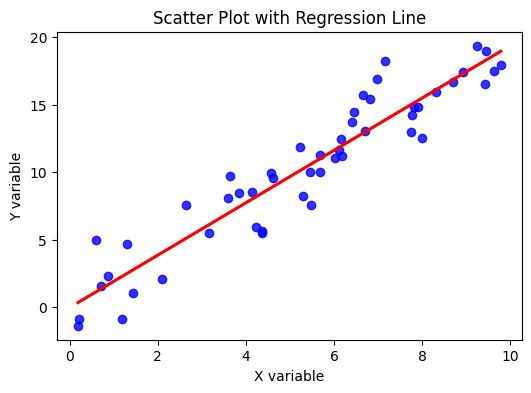

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
x = np.random.rand(50)*10
y = 2*x + np.random.normal(0, 2, 50)

plt.figure(figsize=(6,4))
sns.regplot(x=x, y=y, ci=None, scatter_kws={"color":"blue"}, line_kws={"color":"red"})
plt.title("Scatter Plot with Regression Line")
plt.xlabel("X variable")
plt.ylabel("Y variable")
plt.show()


(b) Correlation Matrix & Heatmap

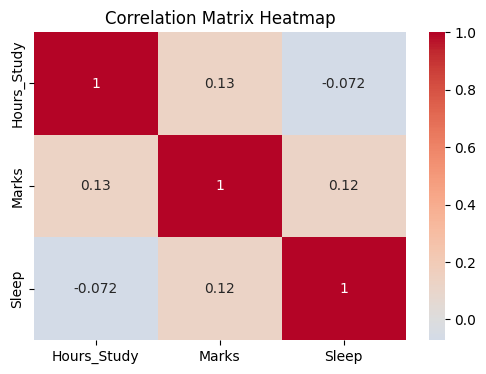

In [23]:
import pandas as pd

# Sample dataset
data = {
    'Hours_Study': np.random.randint(1,10,20),
    'Marks': np.random.randint(40,100,20),
    'Sleep': np.random.randint(5,9,20)
}
df = pd.DataFrame(data)

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()



# **Causation vs Correlation**

### **Definition**

* **Correlation**: A statistical measure (often between –1 and +1) that describes how strongly two variables are related.
* **Causation**: When a change in one variable **directly produces** a change in another.

In simple terms:
👉 **Correlation = relationship**
👉 **Causation = cause-and-effect**

---

### **Why It Matters?**

Just because two things move together **does not** mean one causes the other. Mistaking correlation for causation can lead to **false conclusions** in research, business, medicine, or daily life.

---

### **Real-Life Examples**

1. **Ice Cream Sales & Drowning Cases**

* Data shows both rise in summer.
* **Correlation**: More ice creams sold ↔ More drownings.
* **But Cause?** No!
* **Hidden Variable**: Hot weather increases both swimming (more drowning risk) and ice cream consumption.

---

2. **Coffee Consumption & Productivity**

* Workers who drink coffee may seem more productive.
* **Correlation**: Coffee ↔ Productivity.
* **But is it Causation?** Maybe not.
* Hidden variable: People who are naturally hardworking may also tend to drink coffee.

---

3. **Health Example: Smoking & Lung Cancer**

* Here, strong evidence shows **smoking causes lung cancer**.
* Not just correlated: extensive experiments, biological mechanisms, and longitudinal studies establish **causal link**.

---

### **How to Test Causation?**

Researchers use:

1. **Randomized Controlled Trials (RCTs)** – Random assignment removes hidden variables.
2. **Longitudinal Studies** – Track changes over time.
3. **Statistical Methods** – Like regression with controls, instrumental variables, or Granger causality in time series.

---

### **Visualization Example (Correlation but not Causation)**

We’ll simulate an example where both **ice cream sales** and **drowning incidents** increase with temperature.
relation between ice cream sales and drownings — but the **cause** is actually temperature.



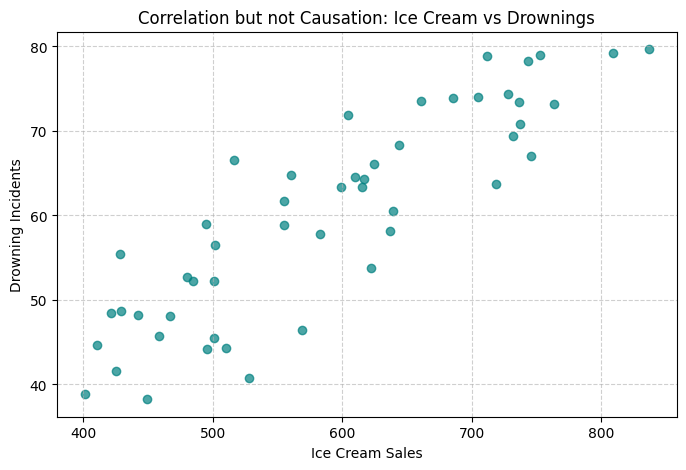

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated data
np.random.seed(42)
temperature = np.linspace(20, 40, 50)  # degrees Celsius
ice_cream_sales = 20 * temperature + np.random.normal(0, 50, 50)
drownings = 2 * temperature + np.random.normal(0, 5, 50)

plt.figure(figsize=(8,5))
plt.scatter(ice_cream_sales, drownings, color="teal", alpha=0.7)
plt.title("Correlation but not Causation: Ice Cream vs Drownings")
plt.xlabel("Ice Cream Sales")
plt.ylabel("Drowning Incidents")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Key Takeaways

- Correlation helps spot patterns.

- Causation requires deeper testing.

- Always look for hidden variables before concluding cause-and-effect.